<h1>Código del Examen parcial - Julián Yordano</h1>

In [23]:
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#Cargo los archivos
#Utilizo el sep para indicar las separaciones de las categorías, 
#sino me dejaría únicamente una columna
df_vinos_rojos = pd.read_csv("winequality-red.csv", sep=";")
df_vinos_blancos = pd.read_csv("winequality-white.csv", sep=";")

In [21]:
#Verifico que no haya nulos en mi dataframe
df_vinos_rojos.info()
df_vinos_blancos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

Veo que no tengo nulos en mis datos, por lo que no necesito eliminar o rellenar filas con data, ya sea con una media u otro método

In [32]:
#Hallo los máximos de cada categoría para realizar una normalización de los datos a analizar (ácido cítrico, alcohol, calidad)
#ácido cítrico
max_ac_ci_r=df_vinos_rojos["citric acid"].max()
max_ac_ci_b=df_vinos_blancos["citric acid"].max()
#Alcohol
max_alc_r=df_vinos_rojos["alcohol"].max()
max_alc_b=df_vinos_blancos["alcohol"].max()
#Calidad
max_cal_r=df_vinos_rojos["quality"].max()
max_cal_b=df_vinos_blancos["quality"].max()

In [37]:
#Vemos valores máximos y asignamos el mayor al que usaremos para normalizar
print("ácidos cítricos máximos:")
print(max_ac_ci_r)
print(max_ac_ci_b)
if (max_ac_ci_r>max_ac_ci_b):
    max_ac_ci=max_ac_ci_r
else:
    max_ac_ci=max_ac_ci_b
print("niveles de alcohol máximos:")
print(max_alc_r)
print(max_alc_b)
if (max_alc_r>max_alc_b):
    max_alc=max_alc_r
else:
    max_alc=max_alc_b
print("calidades máximas:")
print(max_cal_r)
print(max_cal_b)
if (max_cal_r>max_cal_b):
    max_cal=max_cal_r
else:
    max_cal=max_cal_b

#Normalizo según máximo
df_vinos_rojos["citric acid"]=df_vinos_rojos["citric acid"]/max_ac_ci
df_vinos_blancos["citric acid"]=df_vinos_blancos["citric acid"]/max_ac_ci

df_vinos_rojos["alcohol"]=df_vinos_rojos["alcohol"]/max_alc
df_vinos_blancos["alcohol"]=df_vinos_blancos["alcohol"]/max_alc

df_vinos_rojos["quality"]=df_vinos_rojos["quality"]/max_cal
df_vinos_blancos["quality"]=df_vinos_blancos["quality"]/max_cal



ácidos cítricos máximos:
1.0
1.66
niveles de alcohol máximos:
14.9
14.2
calidades máximas:
8
9


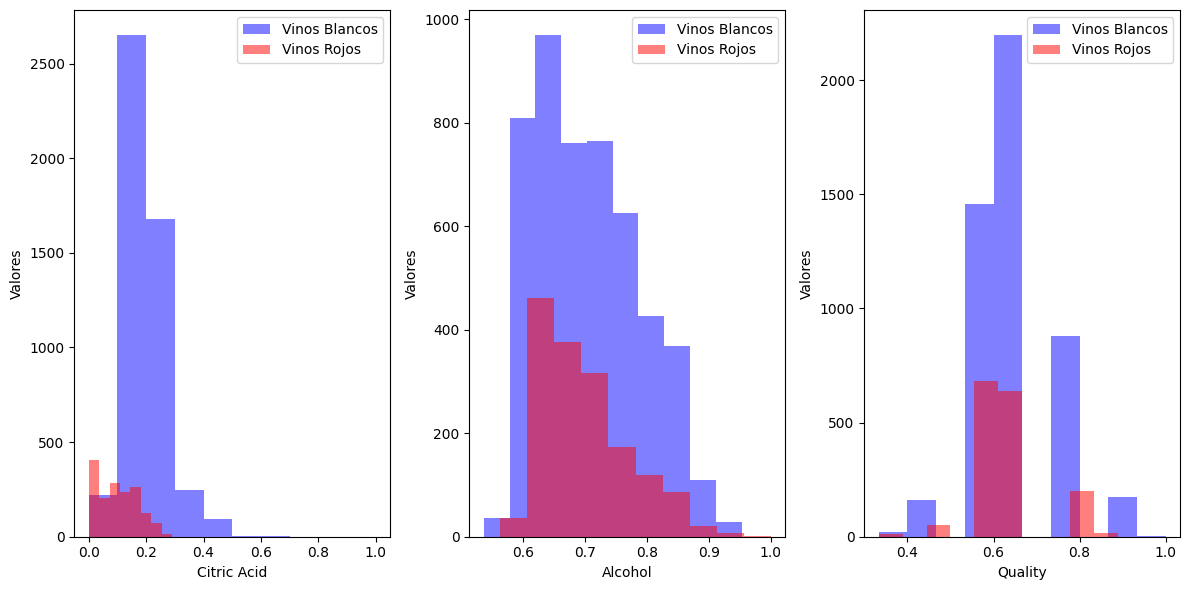

In [40]:
#Gráfica de datos (Tipos de vino, ácido cítrico, alcohol y calidad)

# Extrae las columnas de interés de cada DataFrame
columnas_interes_blancos = ['citric acid', 'alcohol', 'quality']
columnas_interes_rojos = ['citric acid', 'alcohol', 'quality']

# Crea tres gráficos superpuestos
plt.figure(figsize=(12, 6))

# Gráfico 1: 'citric acid' de vinos blancos y rojos
plt.subplot(131)
plt.hist(df_vinos_blancos['citric acid'], color='blue', alpha=0.5, label='Vinos Blancos')
plt.hist(df_vinos_rojos['citric acid'], color='red', alpha=0.5, label='Vinos Rojos')
plt.ylabel('Cantidades de vinos')
plt.xlabel('Citric Acid')
plt.legend()

# Gráfico 2: 'alcohol' de vinos blancos y rojos
plt.subplot(132)
plt.hist(df_vinos_blancos['alcohol'], color='blue', alpha=0.5, label='Vinos Blancos')
plt.hist(df_vinos_rojos['alcohol'], color='red', alpha=0.5, label='Vinos Rojos')
plt.ylabel('Cantidades de vinos')
plt.xlabel('Alcohol')
plt.legend()

# Gráfico 3: 'quality' de vinos blancos y rojos
plt.subplot(133)
plt.hist(df_vinos_blancos['quality'], color='blue', alpha=0.5, label='Vinos Blancos')
plt.hist(df_vinos_rojos['quality'], color='red', alpha=0.5, label='Vinos Rojos')
plt.ylabel('Cantidades de vinos')
plt.xlabel('Quality')
plt.legend()

# Ajusto el diseño
plt.tight_layout()

# Muestra los gráficos superpuestos
plt.show()

<h4>Puede observarse que los vinos tintos tienen una tendencia menor a ser cítricos, mientras que los blancos son en su mayoría cítricos. Si analizamos mas profundamente la primer gráfica, vemos que los vinos blancos en su mayoría poseen un nivel de ácido cítrico del 0.332.



Si analizamos los niveles de alcohol que contienen ambos tipos, notamos que son prácticamente similares. Ambos tienen Niveles de alcohol de unos 0.65 normalizados respectos del máximo. Esto quiere decir, que el nivel de alcohol general de ambos vinos es el mismo, y es de aproximadamente 0.65*14.9=9.685.


Por último, y no menos importante, analicemos la calidad de los vinos. Se ve que los vinos tintos son más estables en cuanto a calidad, ya que su mayoría tienen una calidad que rodea los 0.6*9=5.4. En cambio, los vinos blancos son más variados, pueden encontrarse bastantes de una calidad media, pero también hay varios de calidad mayor (aproximadamente unas 800 muestras). También se ven algunos vinos blancos de baja calidad, mientras que los tintos de baja calidad son casi inexistentes.</h4>